# 12 Jan - Word2Vec

In [1]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import spacy
import string
import time

### 1. Load Data

In [2]:
#create the training corpus
#I use excerpts from some movie speeches
corpus = ["""I'm sorry, but I don't want to be an Emperor -- that's not my business. I don't want to rule or conquer anyone. I should like to help everyone, if possible -- Jew, gentile, black man, white. We all want to help one another; human beings are like that. We want to live by each other's happiness, not by each other's misery. We don't want to hate and despise one another. In this world there's room for everyone and the good earth is rich and can provide for everyone.""", 
          """The way of life can be free and beautiful. But we have lost the way. Greed has poisoned men's souls, has barricaded the world with hate, has goose-stepped us into misery and bloodshed. We have developed speed but we have shut ourselves in. Machinery that gives abundance has left us in want. Our knowledge has made us cynical, our cleverness hard and unkind. We think too much and feel too little. More than machinery, we need humanity. More than cleverness, we need kindness and gentleness. Without these qualities, life will be violent and all will be lost.""", 
          """The aeroplane and the radio have brought us closer together. The very nature of these inventions cries out for the goodness in men, cries out for universal brotherhood for the unity of us all. Even now my voice is reaching millions throughout the world, millions of despairing men, women, and little children, victims of a system that makes men torture and imprison innocent people.""", 
          """To those who can hear me I say, do not despair. The misery that is now upon us is but the passing of greed, the bitterness of men who fear the way of human progress. The hate of men will pass and dictators die; and the power they took from the people will return to the people and so long as men die, liberty will never perish.""", 
          """Soldiers: Don't give yourselves to brutes, men who despise you, enslave you, who regiment your lives, tell you what to do, what to think and what to feel; who drill you, diet you, treat you like cattle, use you as cannon fodder. Don't give yourselves to these unnatural men, machine men, with machine minds and machine hearts! You are not machines! You are not cattle! You are men! You have the love of humanity in your hearts. You don't hate; only the unloved hate, the unloved and the unnatural.""", 
          """Soldiers: Don't fight for slavery! Fight for liberty! In the seventeenth chapter of Saint Luke it is written, "the kingdom of God is within man" -- not one man, nor a group of men, but in all men, in you, you the people have the power, the power to create machines, the power to create happiness. You the people have the power to make this life free and beautiful, to make this life a wonderful adventure.""", 
          """Then, in the name of democracy, let us use that power! Let us all unite!! Let us fight for a new world, a decent world that will give men a chance to work, that will give you the future and old age a security. By the promise of these things, brutes have risen to power, but they lie! They do not fulfill their promise; they never will. Dictators free themselves, but they enslave the people!! Now, let us fight to fulfill that promise!! Let us fight to free the world, to do away with national barriers, to do away with greed, with hate and intolerance. Let us fight for a world of reason, a world where science and progress will lead to all men's happiness. Soldiers: In the name of democracy, let us all unite!!!""", 
          """Hannah, can you hear me? Wherever you are, look up, Hannah. The clouds are lifting. The sun is breaking through. We are coming out of the darkness into the light. We are coming into a new world, a kindlier world, where men will rise above their hate, their greed and brutality.""", 
          """Look up, Hannah. The soul of man has been given wings, and at last he is beginning to fly. He is flying into the rainbow -- into the light of hope, into the future, the glorious future that belongs to you, to me, and to all of us. Look up, Hannah. Look up!""", 
          """I praise such courage. I need such courage because in this cause I, too, am prepared to die. But, my friend, there is no cause for which I am prepared to kill. Whatever they do to us, we will attack no one, kill no one, but we will not give our fingerprints -- not one of us.  They will imprison us, and they will fine us. They will seize our possessions, but they cannot take away our self-respect if we do not give it to them.""", 
          """I am asking you to fight! To fight against their anger, not to provoke it. We will not strike a blow, but we will receive them. And through our pain we will make them see their injustice, and it will hurt -- as all fighting hurts. But we cannot lose. We cannot. They may torture my body, break my bones, even kill me. Then, they will have my dead body -- not my obedience. We are Hindu and Muslim, children of God, each one of us. Let us take a solemn oath, in His name, that come what may we will not submit to this law.""", 
          """Since I returned from South Africa, I have traveled over much of India. And I know that I could travel for many more years and still only see a small part of her. And yet, I already know that what we say here means nothing to the masses of our country. Here, we make speeches for each other, and those English liberal magazines that may grant us a few lines. But the people of India are untouched. Their politics are confined to bread and salt. Illiterate they may be, but they're not blind. They see no reason to give their loyalty to rich and powerful men who simply want to take over the role of the British in the name of freedom. This Congress tells the world it represents India. My brothers, India is 700,000 villages, not a few hundred lawyers in Delhi and Bombay. Until we stand in the fields with the millions that toil each day under the hot sun, we will not represent India -- nor will we ever be able to challenge the British as one nation.""", 
          """My message to you is the message I have given to your brothers everywhere: To gain independence, we must prove worthy of it. There must be Hindu-Muslim unity always. Second, no Indian must be treated as the English treat us. We must remove untouchability from our hearts and from our lives. Third, we must defy the British. Not with violence that will inflame their will, but with a firmness that will open their eyes. English factories make the cloth that makes our poverty. All those who wish to make the English see, bring me the cloth from Manchester and leaves that you wear today, and we will light a fire that will be seen in Delhi and in London. And if, like me, you are left with only one piece of homespun, wear it with dignity.""", 
          """Our enemy is no longer the Afrikaner. They are our fellow South Africans, our partners in democracy. And they treasure Springbok rugby. If we take that away, we lose them. We prove that we are what they feared we would be. We have to be better than that. We have to surprise them with compassion, with restraint, and generosity. I know – all of the things they denied us. But this is no time to celebrate petty revenge. This is the time to build our nation using every single brick available to us – even if that brick comes wrapped in green and gold. You elected me your leader. Let me lead you now.""", 
          """Blessed are the poor in spirit -- for theirs is the kingdom of heaven. Blessed are those who mourn -- for they shall be comforted. Blessed are the meek -- for they shall inherit the earth. Blessed are those who hunger and thirst for what is right -- for they shall be filled. Blessed are the merciful -- for they shall obtain mercy. Blessed are the pure in heart -- for they shall see God. Blessed are the peacemakers -- for they shall be called sons of God. Blessed are those who are persecuted in the cause of right -- for theirs is the kingdom of heaven. Blessed are you when people abuse you, and persecute you, and speak all kinds of ... against you for my sake. Rejoice and be glad, for your reward will be great in heaven. As it was with the prophets persecuted before you.""", 
          """Love your enemies. Do good to those who hate you. Bless those who curse you. Pray for those who mistreat you. If anyone strikes you on the one cheek, let him hit the other one also. And if someone takes away your coat, let him have your shirt as well. Give to everyone who begs from you. And if someone takes what is yours, do not ask for it back again. Do for others only what you would have others do for you.""", 
          """If you love only the people who love you, why should you receive a blessing -- for even sinners love those who love them. And if you do good to those who do good to you, why should you receive a blessing -- even sinners do that. No, love your enemies and do good to them. And lend expecting nothing back. And then you will have a great reward -- for you will be sons of the Most High God. For He is good to the ungrateful and to the wicked.""", 
          """Be merciful just as your Father is merciful. Judge not and you will not be judged. Condemn not and you will not be condemned. Forgive and you will be forgiven. Give and it will be given to you -- for the measure you give will be the measure you get back. One blind man cannot lead another. If he does they will both fall into a ditch. Why do you see the speck that is in your brothers eye, but pay no attention to the log in your own eye.""", 
          """What about those of us who knew better, we who knew the words were lies and worse than lies? Why did we sit silent? Why did we take part? Because we loved our country. What difference does it make if a few political extremists lose their rights? What difference does it make if a few racial minorities lose their rights? It is only a passing phase. It is only a stage we are going through. It will be discarded sooner or later. Hitler himself will be discarded -- sooner or later.  The country is in danger. We will march out of the shadows! We will go forward. FORWARD is the great password.""", 
          """Your Honor, I was content to sit silent during this trial. I was content to tend my roses. I was even content to let counsel try to save my name, until I realized that in order to save it, he would have to raise the specter again. You have seen him do it. He has done it, here, in this courtroom. He has suggested that the Third Reich worked for the benefit of people. He has suggested that we sterilized men for the welfare of the country. He has suggested that perhaps the old Jew did sleep with the 16-year-old girl after all. Once more, it is being done -- for love of country.""", 
          """It is not easy to tell the truth. But if there is to be any salvation for Germany, we who know our guilt must admit it -- whatever the pain and humiliation. I had reached my verdict on the Feldenstein case before I ever came into the courtroom. I would have found him guilty, whatever the evidence. It was not a trial at all. It was a sacrificial ritual in which Feldenstein, the Jew, was the helpless victim.""", 
          """I am aware. I am aware! My counsel would have you believe we were not aware of the concentration camps. Not aware. Where were we? Where were we when Hitler began shrieking his hate in Reichstag? Where were we when our neighbors were being dragged out in the middle of the night to Dachau?! Where were we when every village in Germany has a railroad terminal where cattle cars were filled with children being carried off to their extermination?! Where were we when they cried out in the night to us. Were we deaf? Dumb?! Blind?!!""", 
          """My counsel says we were not aware of the extermination of the millions. He would give you the excuse: We were only aware of the extermination of the hundreds. Does that make us any the less guilty? Maybe we didn't know the details. But if we didn't know, it was because we didn't want to know.""", 
          """I am going to tell them the truth. I am going to tell them the truth if the whole world conspires against it. I am going to tell them the truth about their Ministry of Justice. Werner Lammpe, an old man who cries into his Bible now, an old man who profited by the property expropriation of every man he sent to a concentration camp. Friedrich Hofstetter, the "good German" who knew how to take orders, who sent men before him to be sterilized like so many digits. Emil Hahn, the decayed, corrupt bigot, obsessed by the evil within himself. And Ernst Janning, worse than any of them because he knew what they were, and he went along with them. Ernst Janning: Who made his life excrement, because he walked with them.""", 
          """No, Your Honor. No! Germany alone is not guilty: The whole world is as responsible for Hitler's Germany. It is an easy thing to condemn one man in the dock. It is easy to condemn the German people to speak of the basic flaw in the German character that allowed Hitler to rise to power and at the same time positively ignore the basic flaw of character that made the Russians sign pacts with him, Winston Churchill praise him, American industrialists profit by him!! Ernst Janning said he is guilty. If he is, Ernst Janning's guilt is the world's guilt -- no more and no less.""", 
          """Simple murders and atrocities do not constitute the gravamen of the charges in this indictment. Rather, the charge is that of conscious participation in a nationwide, government organized system of cruelty and injustice in violation of every moral and legal principle known to all civilized nations. The Tribunal has carefully studied the record and found therein abundant evidence to support beyond a reasonable doubt the charges against these defendants.""", 
          """Heir Rolfe, in his very skillful defense, has asserted that there are others who must share the ultimate responsibility for what happened here in Germany. There is truth in this. The real complaining party at the bar in this courtroom is civilization. But the Tribunal does say that the men in the dock are responsible for their actions, men who sat in black robes in judgment on other men, men who took part in the enactment of laws and decrees, the purpose of which was the extermination of human beings, men who in executive positions actively participated in the enforcement of these laws -- illegal even under German law. The principle of criminal law in every civilized society has this in common: Any person who sways another to commit murder, any person who furnishes the lethal weapon for the purpose of the crime, any person who is an accessory to the crime -- is guilty.""", 
          """Heir Rolfe further asserts that the defendant, Janning, was an extraordinary jurist and acted in what he thought was the best interest of this country. There is truth in this also. Janning, to be sure, is a tragic figure. We believe he loathed the evil he did. But compassion for the present torture of his soul must not beget forgetfulness of the torture and the death of millions by the Government of which he was a part. Janning's record and his fate illuminate the most shattering truth that has emerged from this trial: If he and all of the other defendants had been degraded perverts, if all of the leaders of the Third Reich had been sadistic monsters and maniacs, then these events would have no more moral significance than an earthquake, or any other natural catastrophe. But this trial has shown that under a national crisis, ordinary -- even able and extraordinary -- men can delude themselves into the commission of crimes so vast and heinous that they beggar the imagination. No one who has sat through the trial can ever forget them: men sterilized because of political belief; a mockery made of friendship and faith; the murder of children. How easily it can happen.""", 
          """There are those in our own country too who today speak of the "protection of country" -- of "survival." A decision must be made in the life of every nation at the very moment when the grasp of the enemy is at its throat. Then, it seems that the only way to survive is to use the means of the enemy, to rest survival upon what is expedient -- to look the other way. Well, the answer to that is "survival as what?" A country isn't a rock. It's not an extension of one's self. It's what it stands for. It's what it stands for when standing for something is the most difficult! Before the people of the world, let it now be noted that here, in our decision, this is what we stand for: justice, truth, and the value of a single human being.""", 
          """Gentle Romans. Gentle Romans, hear me. Friends, Romans, countrymen, lend me your ears! I come to bury Caesar, not to praise him. The evil that men do lives after them. The good is oft interred with their bones. So let it be with Caesar. The noble Brutus hath told you Caesar was ambitious. If it were so, it was a grievous fault, and grievously hath Caesar answered it.""", 
          """But yesterday the word of Caesar might have stood against the world. Now lies he there and none so poor to do him reverence. Oh masters, if I were disposed to stir your hearts and minds to mutiny and rage, I should do Brutus wrong, and Cassius wrong -- who, you all know, are honorable men. I will not do them wrong. I rather choose to wrong the dead, to wrong myself and you, than I will wrong such honorable men.""", 
          """Have patience, gentle friends. I must not read it. It is not meet you know how Caesar loved you. You are not wood; you are not stones, but men; and, being men, hearing the will of Caesar, it will inflame you; it will make you mad. 'Tis good you know not that you are his heirs. For, if you should, oh, what would come of it!""", 
          """If you have tears, prepare to shed them now. You all do know this mantle. I remember the first time ever Caesar put it on. 'Twas on a summer's evening in his tent, that day he overcame the Nervii. Look, in this place ran Cassius' dagger through. See what a rent the envious Casca made. Through this the well-beloved Brutus stabbed, and as he plucked his cursed steel away, mark how the blood of Caesar followed it, as rushing out of doors, to be resolved if Brutus so unkindly knocked, or no. For Brutus, as you know, was Caesar's angel. Judge, oh ye gods, how dearly Caesar loved him. This was the most unkindest cut of all. For when the noble Caesar saw him stab, ingratitude, more strong than traitors' arms, quite vanquished him. Then burst his mighty heart. And in his mantle muffling up his face, even at the base of Pompey's statue, which all the while ran blood, great Caesar fell. Oh, what a fall was there, my countrymen. Then I, and you, and all of us fell down, whilst bloody treason flourished over us.""", 
          """Now, now you weep. And I perceive you feel the dint of pity. These are gracious drops. Kind souls, what weep you when you but behold our Caesar's vesture wounded? Look you here. Here is himself, marred, as you see, with traitors.""", 
          """I come not, friends, to steal away your hearts. I am no orator, as Brutus is; but, as you know me all, a plain blunt man that loved my friend. And that they know full well that gave me public leave to speak of him. For I have neither wit, nor words, nor worth, action, nor utterance, nor the power of speech to stir men's blood. I only speak right on. I tell you that which you yourselves do know. Show you sweet Caesar's wounds, poor poor dumb mouths, and bid them speak for me. But were I Brutus, and Brutus Antony, there were an Antony would ruffle up your spirits and put a tongue in every wound of Caesar that should move the stones of Rome to rise in mutiny.""", 
          """It has fallen to us to defend Jerusalem, and we have made our preparations as well as they can be made. None of us took this city from Muslims. No Muslim of the great army now coming against us was born when this city was lost. We fight over an offence we did not give, against those who were not alive to be offended. What is Jerusalem? Your holy places lie over the Jewish temple that the Romans pulled down. The Muslim places of worship lie over yours. Which is more holy? The wall? The Mosque? The Sepulcher? Who has claim? No one has claim. All have claim!""", 
          """With malice toward none; With charity for all; With firmness in the right, as God gives us to see the right, let us strive on to finish the work we are in; to bind up the nation's wounds; To care for him who shall have borne the battle, and for his widow, and his orphan to do all which may achieve and cherish a just, and a lasting peace, among ourselves, and with all nations.""", 
          """Ryan -- I don't know anything about Ryan. I don't care. Man means nothin' to me. It's just a name. But if -- you know -- if going to Ramel and finding him so he can go home, if that earns me the right to get back to my wife -- well, then, then that's my mission. You wanna leave? You wanna go off and fight the war? Alright. Alright, I won't stop you. I'll even put in the paperwork. I just know that every man I kill the farther away from home I feel.""", 
          """You're building a rat ship here. A vessel for sea going snitches. And if you think you're preparing these minnows for manhood you better think again. Because I say you are killing the very spirit this institution proclaims it instills! What a sham. What kind of a show are you guys putting on here today. I mean, the only class in this act is sitting next to me. And I'm here to tell ya this boy's soul is intact. It's non-negotiable.""", 
          """I've been around, you know? There was a time I could see. And I have seen boys like these, younger than these, their arms torn out, their legs ripped off. But there isn't nothing like the sight of an amputated spirit; there is no prosthetic for that. You think you're merely sending this splendid foot-soldier back home to Oregon with his tail between his legs, but I say you are executing his SOUL!!""", 
          """I'm not a judge or jury. But I can tell you this: he won't sell anybody out to buy his future!! And that, my friends, is called integrity! That's called courage! Now that's the stuff leaders should be made of. Now I have come to the crossroads in my life. I always knew what the right path was. Without exception, I knew. But I never took it. You know why? It was too damn hard. Now here's Charlie. He's come to the crossroads. He has chosen a path. It's the right path. It's a path made of principle -- that leads to character. Let him continue on his journey.""", 
          """I am member of the Nazi Party. I'm a munitions manufacturer. I'm a profiteer of slave labor. I am... a criminal. At midnight, you'll be free and I'll be hunted. I shall remain with you until five minutes after midnight, after which time -- and I hope you'll forgive me -- I have to flee.""", 
          """I know you have received orders from our Commandant, which he has received from his superiors, to dispose of the population of this camp. Now would be the time to do it. Here they are; they're all here. This is your opportunity....Or, you could leave and return to your families as men -- instead of murderers.""", 
          """You want to claim this land as the land of the free? Then the symbol of your country cannot just be a flag. The symbol also has to be one of its citizens exercising his right to burn that flag in protest. Now show me that, defend that, celebrate that in your classrooms. Then you can stand up and sing about the land of the free.""", 
          """You must excuse me. I have prepared a speech, but I find now that I have nothing to say, or rather I have three very small words, but they are most deeply felt. They are these: I am sorry. I am sorry because I have failed to give you what you have the right to demand of me as your teacher: sympathy, encouragement, and humanity. I'm sorry because I have deserved the nickname of "Himmler" and because by so doing I have degraded the noblest calling that a man can follow -- the care and molding of the young.""", 
          """I claim no excuses. When I came here I knew what I had to do, and I have not done it. I have failed, and miserably failed. I can only hope that you and the countless others who have gone before will find it in your hearts to forgive me for having let you down. I shall not find it so easy to forgive myself.""", 
          """And, Mr. Chairman, I stand for the separation of Church and State, and the reason that I stand for that is the same reason that I believe our forefathers did. It is not there to protect religion from the grasp of government but to protect our government from the grasp of religious fanaticism.""", 
          """Now, I may be an atheist, but that does not mean I do not go to church. I do go to church. The church I go to is the one that emancipated the slaves and gave women the right to vote. It gave us every freedom that we hold dear. My church is this very Chapel of Democracy that we sit in together, and I do not need God to tell me what are my moral absolutes. I need my heart, my brain, and this church.""", 
          """Man cannot survive except through his mind. He comes on earth unarmed. His brain is his only weapon. But the mind is an attribute of the individual. There is no such thing as a collective brain. The man who thinks must think and act on his own. The reasoning mind cannot work under any form of compulsion. It cannot be subordinated to the needs, opinions, or wishes of others. It is not an object of sacrifice.""", 
          """The creator stands on his own judgment; the parasite follows the opinions of others. The creator thinks; the parasite copies. The creator produces; the parasite loots. The creator's concern is the conquest of nature; the parasite's concern is the conquest of men. The creator requires independence. He neither serves nor rules. He deals with men by free exchange and voluntary choice. The parasite seeks power. He wants to bind all men together in common action and common slavery. He claims that man is only a tool for the use of others -- that he must think as they think, act as they act, and live in selfless, joyless servitude to any need but his own.""", 
          """Our country, the noblest country in the history of men, was based on the principle of individualism, the principle of man's inalienable rights. It was a country where a man was free to seek his own happiness, to gain and produce, not to give up and renounce; to prosper, not to starve; to achieve, not to plunder; to hold as his highest possession a sense of his personal value, and as his highest virtue his self-respect.""", 
          """In this grave hour, perhaps the most fateful in our history, I send to every household of my peoples, both at home and overseas, this message, spoken with the same depth of feeling for each one of you as if I were able to cross your threshold and speak to you myself.""", 
          """Over and over again we have tried to find a peaceful way out of the differences between ourselves and those who are now our enemies. But it has been in vain. We have been forced into a conflict. For we are called to meet the challenge of a principle which, if it were to prevail, would be fatal to any civilized order in the world. Such a principle, stripped of all disguise, is surely the mere primitive doctrine that "might is right." """, 
          """For the sake of all that we ourselves hold dear, it is unthinkable that we should refuse to meet the challenge. It is to this high purpose that I now call my people at home and my peoples across the seas, who will make our cause their own. I ask them to stand calm and firm and united in this time of trial.""", 
          """The task will be hard. There may be dark days ahead, and war can no longer be confined to the battlefield. But we can only do the right as we see the right, and reverently commit our cause to God. If one and all we keep resolutely faithful to it, then, with God's help, we shall prevail.""", 
          """I shall tell the truth. Because if I did not, my nights would be haunted by the specter of an innocent being expiating under the most frightful torture a crime he never committed. It is impossible for honest people to read the iniquitous bill of accusation against Dreyfus without being overcome with indignation and crying out their revulsion.""", 
          """However, my profession is writing, not talking. But from my struggling youth until today my principal aim has been to strive for truth. That is why I entered this fight. All my friends have told me that it was insane for a single person to oppose the immense machinery of the law, the glory of the Army, and the power of the State. They warned me that my actions would be mercilessly crushed -- that I would be destroyed. But what does it matter if an individual is shattered, if only justice is resurrected?""", 
          """Not only is an innocent man crying out for justice, but more -- much more -- a great nation is in desperate danger of forfeiting her honor. Do not take upon yourselves a fault, the burden of which you will forever bear in history. A judicial blunder has been committed! The condemnation of an innocent man induced the acquittal of a guilty man. And now, today, you're asked to condemn me because I rebelled on seeing our country embarked on this terrible course.""", 
          """Let us not mourn him. Let us rather salute that bright spirit of his which will live forever, and like a torch, enlighten a younger generation inspired to follow him. You who are enjoying today's freedom, take to your hearts the words of Zola. Do not forget those who fought the battles for you and bought your liberty with their genius and their blood. Do not forget them and applaud the lies of fanatical intolerance. Be human. For no man in all the breadth of our land more fervently loved humanity than Zola.""", 
          """He had the simplicity of a great soul. He was enjoying the fruits of his labor -- fame, wealth, security -- when suddenly, out of his own free will, he tore himself from all the peaceful pleasures of his life, from the work he loved so much because he knew that there is no serenity, save in justice; no repose -- save in truth.""", 
          """At the sound of his brave words, France wakened from her sleep. How admirable is the genius of our country. How beautiful the soul of France which for centuries taught right and justice to Europe and the world. France is once again today the land of reason and benevolence because one of her sons, through an immense work and a great action, gave rise to a new order of things based on justice and the rights common to all men. Let us not pity him because he suffered and endured. Let us envy him. Let us envy him because his great heart won him the proudest of destinies: He was a moment of the conscience of man.""", 
          """Rehabilitated? Well, now, let me see. You know, I don't have any idea what that means. I know what you think it means, sonny. To me, it's just a made-up word, a politician's word, so that young fellas like yourself can wear a suit and a tie and have a job. What do you really wanna know? Am I sorry for what I did?""", 
          """There's not a day goes by I don't feel regret. Not because I'm in here, or because you think I should. I look back on the way I was then, a young, stupid kid who committed that terrible crime. I wanna talk to him. I wanna try to talk some sense to him -- tell him the way things are. But I can't. That kid's long gone and this old man is all that's left. I gotta live with that.""", 
          """I mean there is no justice. The rich win; the poor are powerless. We become tired of hearing people lie. And after a time we become dead, a little dead. We think of ourselves as victims -- and we become victims. We become weak; we doubt ourselves; we doubt our beliefs; we doubt our institutions; and we doubt the law.""", 
          """But today you are the law. You are the law, not some book, not the lawyers, not a marble statue, or the trappings of the court. See, those are just symbols of our desire to be just. They are, in fact, a prayer. I mean, a fervent and a frightened prayer.""", 
          """I have nothing but pity in my heart for the Chief Witness for the State. She is the victim of cruel poverty and ignorance. But, my pity does not extend so far as to her putting a man's life at stake, which she has done in an effort to get rid of her own guilt. Now I say "guilt," gentlemen, because it was guilt that motivated her. She's committed no crime. She has merely broken a rigid and time-honored code of our society, a code so severe that whoever breaks it is hounded from our midst as unfit to live with. She must destroy the evidence of her offense. But, what was the evidence of her offense? Tom Robinson, a human being. She must put Tom Robinson away from her. Tom Robinson was to her a daily reminder of what she did.""", 
          """The witnesses for the State, with the exception of the sheriff of Lincoln County, have presented themselves to you gentlemen -- to this Court -- in the cynical confidence that their testimony would not be doubted; confident that you gentlemen would go along with them on the assumption, the evil assumption, that all negroes lie; all negroes are basically immoral beings; all negro men are not to be trusted around our women, an assumption that one associates with minds of their caliber, and which is in itself, gentlemen, a lie -- which I do not need to point out to you.""", 
          """Now, gentlemen, in this country our courts are the great levelers. In our courts, all men are created equal. I'm no idealist to believe firmly in the integrity of our courts and of our jury system. That's no ideal to me. That is a living, working reality! Now I am confident that you gentlemen will review without passion the evidence that you have heard, come to a decision, and restore this man to his family. In the name of God, do your duty. In the name of God, believe Tom Robinson.""", 
          """I am not a destroyer of companies. I am a liberator of them! The point is, ladies and gentleman, that greed -- for lack of a better word -- is good. Greed is right. Greed works. Greed clarifies, cuts through, and captures the essence of the evolutionary spirit. Greed, in all of its forms -- greed for life, for money, for love, knowledge -- has marked the upward surge of mankind. And greed -- you mark my words -- will not only save Teldar Paper, but that other malfunctioning corporation called the USA.""", 
          """Ah, yes, it may be that the human race is doomed, never to learn from its mistakes. We are the only animals on this globe who periodically set out to slaughter each other for the best, the noblest, the most inescapable of reasons. We know better. But we do it again and again in generation after generation. It may be that our empire, too, is doomed -- like all those that have gone before it -- to continue to spew and waste its best blood on foreign soil, no matter what we say or do in this place, or think, or believe, or have learned from history.""", 
          """But, thank God for us, there is still such a thing as moral force. And in spite of every calumny and lie, it is known that upon the whole -- and it is upon the whole that such things must be judged -- British influence is a healthy and a kindly influence.""", 
          """The indictment is grounded in an act of Parliament which is directly repugnant to the law of God and His Holy Church, the Supreme Government of which no temporal person may, by any law, presume to take upon him. This was granted by the mouth of our Savior, Christ himself, to Saint Peter and the Bishops of Rome whilst He lived and was personally present here on earth. It is, therefore, insufficient in law to charge any Christian to obey it.""", 
          """I am the king's true subject, and I pray for him and all the realm. I do none harm. I say none harm. I think none harm. And if this be not enough to keep a man alive, then in good faith I long not to live.""", 
          """So I have to stand here today as what I was when I was born: A black man. Before there was any such thing as a Republican or a Democrat, we were black. Before there was any such thing as a Mason or an Elk, we were black. Before there was any such thing as a Jew or a Christian, we were black people! In fact, before there was any such place as America, we were black! And after America has long passed from the scene, there will still be black people.""", 
          """But, once war has been forced upon us, there is no other alternative than to apply every available means to bring it to a swift end. War's very object is victory, not prolonged indecision. In war there can be no substitute for victory. For history teaches us with unmistakable emphasis that appeasement but begets new and bloodier war. Like blackmail, it lays the basis for new and increasingly greater demands until, as in blackmail, violence becomes the only alternative.""", 
          """Duty, Honor, Country: Those three hallowed words reverently dictate what you ought to be, what you can be, and what you will be. They are your rallying points. They give you a temper of the will, a quality of the imagination, a vigor of the emotions, a freshness of the deep springs of life, a temperamental predominance of courage over timidity, an appetite for adventure over love of ease. In this way, they will teach you to be an officer and a gentleman.""", 
          """The shadows are lengthening for me. The twilight is here. My days of old have vanished in tone and tint. They have gone glimmering through the dreams of things that were. Their memory is one of wondrous beauty, watered by tears, and coaxed and caressed by the smiles of yesterday. I listen vainly, but with thirsty ear, for the witching melody of faint bugles blowing reveille, of far drums beating the long roll. In my dreams I hear the crash of guns, the rattle of musketry, the strange, mournful mutter of the battlefield. But, in the evening of my memory, always I return to West Point.""", 
          """If anybody should ask you what the average John Doe is like, you couldn't tell him because he's a million and one things. He's Mr. Big and Mr. Small. He's simple and he's wise. He's inherently honest, but he's got a streak of larceny in his heart. He seldom walks up to a public telephone without shoving his finger into the slot to see if somebody left a nickel there. He's the man the ads are written for. He's the fella everybody sells things to. He's Joe Doakes, the world's greatest stooge and the world's greatest strength.""", 
          """Yes, sir, we're a great family, the John Does. We are the meek who are -- who are supposed to inherit the earth. You'll find us everywhere. We raise the crops; we dig the mines, work the factories, keep the books, fly the planes and drive the busses. We have existed since time began. We built the pyramids. We saw Christ crucified, pulled the oars for Roman emperors, sailed the boats for Columbus, retreated from Moscow with Napoleon and froze with Washington at Valley Forge.""", 
          """Yes, sir. We've been in there dodging left hooks since before history began to walk. In our struggle for freedom, we've hit the canvas many a time, but we always bounced back! Because we're the people -- and we're tough. They've started a lot of talk about free people going soft -- that we can't take it. That's a lot of hooey! A free people can beat the world at anything, from war to tiddle-de-winks, if we all pull in the same direction.""", 
          """The little punks have always counted because in the long run the character of a country is the sum total of the character of its little punks. But, we've all got to get in there and pitch. We can't win the old ballgame unless we have teamwork. And that's where every John Doe comes in. It's up to him to get together with his teammates. And your teammate, my friend, is the guy next door to you. Your neighbor -- he's a terribly important guy that guy next door. You're gonna need him and he's gonna need you, so look him up. If he's sick, call on him. If he's hungry, feed him. If he's out of a job, find him one.""", 
          """To most of you, your neighbor is a stranger, a guy with a barkin' dog and high fence around him. Now, you can't be a stranger to any guy that's on your own team. So tear down the fence that separates you. Tear down the fence and you'll tear down a lot of hates and prejudices. Tear down all the fences in the country and you'll really have teamwork.""", 
          """Now, why can't that spirit, that same, warm Christmas spirit last the whole year around? Gosh, if it ever did, if each and every John Doe would make that spirit last 365 days out of the year, we'd develop such a strength, we'd create such a tidal wave of good will that no human force could stand against it. Yes sir, my friends, the meek can only inherit the earth when the John Doe's start loving their neighbors. You better start right now. Don't wait till the game is called on account of darkness. Wake up, John Doe. You're the hope of the world.""", 
          """Be seated. Now, I want you to remember that no bastard ever won a war by dying for his country. He won it by making the other poor dumb bastard die for his country. Men, all this stuff you've heard about America not wanting to fight, wanting to stay out of the war, is a lot of horse dung. Americans, traditionally, love to fight. All real Americans love the sting of battle.""", 
          """Now, an army is a team. It lives, eats, sleeps, fights as a team. This individuality stuff is a bunch of crap. The bilious bastards who wrote that stuff about individuality for the Saturday Evening Post don't know anything more about real battle than they do about fornicating.""", 
          """Now, some of you boys, I know, are wondering whether or not you'll chicken-out under fire. Don't worry about it. I can assure you that you will all do your duty. The Nazis are the enemy. Wade into them. Spill their blood. Shoot them in the belly. When you put your hand into a bunch of goo that a moment before was your best friend's face, you'll know what to do.""", 
          """Now, there's another thing I want you to remember. I don't want to get any messages saying that we are holding our position. We're not holding anything. Let the Hun do that. We are advancing constantly and we're not interested in holding onto anything -- except the enemy. We're going to hold onto him by the nose, and we're gonna kick him in the ass. We're gonna kick the hell out of him all the time, and we're gonna go through him like crap through a goose!""", 
          """The fire that danced at the end of that match was a gift from the Titan, Prometheus, a gift that he stole from the gods, who were terrified of what we might do with it were it to fall into our hairy little paws. When Prometheus was caught and brought to justice for his theft, the gods, well, you might say they overreacted a little. The poor man was tied to a rock as an eagle ripped through his belly and ate his liver over and over, day after day, ad infinitum. All because he gave us fire, our first true piece of technology. Fire.""", 
          """I come from a world of books, and there is much to learn in their pages, but I have much else to learn. There is ferment and division alive in our land. Certain priests accept -- express the most radical ideas glibly. But none of us can pretend to know all the answers and demand that others implement them. We, in the Church, must keep to the center, watchfully, in the traditional way, but seeking justice.""", 
          """If this were an ordinary funeral, I'd speak of my friendship with Father Grande. At crucial moments in my life he was always there, close to me, and those times will never be forgotten. But this is a moment to gather from these deaths a message for all of us who remain on pilgrimage. The liberation that Father Grande preached was a liberation rooted in faith. And because it is so often misunderstood, for it Father Rutilio Grande died. Who knows? Perhaps the murderers are listening to these words. So we want to tell you, murderous brethren, that we love you, and that we ask for repentance in your hearts.""", 
          """I'd like to make an appeal in a special way to the men in the army. Brothers, each one of you is one of us. We are the same People. The farmers and peasants that you kill are your own brothers and sisters. When you hear the words of a man telling you to kill -- Think instead in the words of God: "Thou shalt not kill!" No soldier is obliged to obey an order contrary to the Law of God. In His Name and in the name of our tormented people who have suffered so much, and whose laments cry out to heaven: I implore you! I beg you! I ORDER you!! STOP THE REPRESSION!!!"""]


In [3]:
#tokenize the corpus
corpus_tokenized = [[]] * len(corpus)
nlp = spacy.load("en_core_web_sm")
for i in range(len(corpus)):
    corpus_tokenized[i] = [str(words).lower() for words in nlp(corpus[i])]   

print(corpus_tokenized[:5])

[['i', "'m", 'sorry', ',', 'but', 'i', 'do', "n't", 'want', 'to', 'be', 'an', 'emperor', '--', 'that', "'s", 'not', 'my', 'business', '.', 'i', 'do', "n't", 'want', 'to', 'rule', 'or', 'conquer', 'anyone', '.', 'i', 'should', 'like', 'to', 'help', 'everyone', ',', 'if', 'possible', '--', 'jew', ',', 'gentile', ',', 'black', 'man', ',', 'white', '.', 'we', 'all', 'want', 'to', 'help', 'one', 'another', ';', 'human', 'beings', 'are', 'like', 'that', '.', 'we', 'want', 'to', 'live', 'by', 'each', 'other', "'s", 'happiness', ',', 'not', 'by', 'each', 'other', "'s", 'misery', '.', 'we', 'do', "n't", 'want', 'to', 'hate', 'and', 'despise', 'one', 'another', '.', 'in', 'this', 'world', 'there', "'s", 'room', 'for', 'everyone', 'and', 'the', 'good', 'earth', 'is', 'rich', 'and', 'can', 'provide', 'for', 'everyone', '.'], ['the', 'way', 'of', 'life', 'can', 'be', 'free', 'and', 'beautiful', '.', 'but', 'we', 'have', 'lost', 'the', 'way', '.', 'greed', 'has', 'poisoned', 'men', "'s", 'souls', ',

In [4]:
#remove stop words
stopwords = nlp.Defaults.stop_words

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in stopwords:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['sorry', ',', 'want', 'emperor', '--', 'business', '.', 'want', 'rule', 'conquer', '.', 'like', 'help', ',', 'possible', '--', 'jew', ',', 'gentile', ',', 'black', 'man', ',', 'white', '.', 'want', 'help', ';', 'human', 'beings', 'like', '.', 'want', 'live', 'happiness', ',', 'misery', '.', 'want', 'hate', 'despise', '.', 'world', 'room', 'good', 'earth', 'rich', 'provide', '.'], ['way', 'life', 'free', 'beautiful', '.', 'lost', 'way', '.', 'greed', 'poisoned', 'men', 'souls', ',', 'barricaded', 'world', 'hate', ',', 'goose', '-', 'stepped', 'misery', 'bloodshed', '.', 'developed', 'speed', 'shut', '.', 'machinery', 'gives', 'abundance', 'left', 'want', '.', 'knowledge', 'cynical', ',', 'cleverness', 'hard', 'unkind', '.', 'think', 'feel', 'little', '.', 'machinery', ',', 'need', 'humanity', '.', 'cleverness', ',', 'need', 'kindness', 'gentleness', '.', 'qualities', ',', 'life', 'violent', 'lost', '.'], ['aeroplane', 'radio', 'brought', 'closer', '.', 'nature', 'inventions', 'cries',

In [5]:
#remove punctutations
punctutations = string.punctuation

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in punctutations:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['sorry', 'want', 'emperor', '--', 'business', 'want', 'rule', 'conquer', 'like', 'help', 'possible', '--', 'jew', 'gentile', 'black', 'man', 'white', 'want', 'help', 'human', 'beings', 'like', 'want', 'live', 'happiness', 'misery', 'want', 'hate', 'despise', 'world', 'room', 'good', 'earth', 'rich', 'provide'], ['way', 'life', 'free', 'beautiful', 'lost', 'way', 'greed', 'poisoned', 'men', 'souls', 'barricaded', 'world', 'hate', 'goose', 'stepped', 'misery', 'bloodshed', 'developed', 'speed', 'shut', 'machinery', 'gives', 'abundance', 'left', 'want', 'knowledge', 'cynical', 'cleverness', 'hard', 'unkind', 'think', 'feel', 'little', 'machinery', 'need', 'humanity', 'cleverness', 'need', 'kindness', 'gentleness', 'qualities', 'life', 'violent', 'lost'], ['aeroplane', 'radio', 'brought', 'closer', 'nature', 'inventions', 'cries', 'goodness', 'men', 'cries', 'universal', 'brotherhood', 'unity', 'voice', 'reaching', 'millions', 'world', 'millions', 'despairing', 'men', 'women', 'little', 

In [6]:
#remove '--'
for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word == '--':
            sentence.remove(word)

print(corpus_tokenized[:5])

[['sorry', 'want', 'emperor', 'business', 'want', 'rule', 'conquer', 'like', 'help', 'possible', 'jew', 'gentile', 'black', 'man', 'white', 'want', 'help', 'human', 'beings', 'like', 'want', 'live', 'happiness', 'misery', 'want', 'hate', 'despise', 'world', 'room', 'good', 'earth', 'rich', 'provide'], ['way', 'life', 'free', 'beautiful', 'lost', 'way', 'greed', 'poisoned', 'men', 'souls', 'barricaded', 'world', 'hate', 'goose', 'stepped', 'misery', 'bloodshed', 'developed', 'speed', 'shut', 'machinery', 'gives', 'abundance', 'left', 'want', 'knowledge', 'cynical', 'cleverness', 'hard', 'unkind', 'think', 'feel', 'little', 'machinery', 'need', 'humanity', 'cleverness', 'need', 'kindness', 'gentleness', 'qualities', 'life', 'violent', 'lost'], ['aeroplane', 'radio', 'brought', 'closer', 'nature', 'inventions', 'cries', 'goodness', 'men', 'cries', 'universal', 'brotherhood', 'unity', 'voice', 'reaching', 'millions', 'world', 'millions', 'despairing', 'men', 'women', 'little', 'children', 

In [7]:
#get unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs = list(set(flatten(corpus_tokenized)))

print(len(vocabs))

1635


In [8]:
#numericalize the words
word2index = {w: i for i, w in enumerate(vocabs)}

In [9]:
#append UNK
vocabs.append('<UNK>')
word2index['<UNK>'] = 1635

print(word2index)

{'blessing': 0, 'think': 1, 'basically': 2, 'enjoying': 3, 'blessed': 4, 'insane': 5, 'sacrifice': 6, 'fall': 7, 'wall': 8, 'jury': 9, 'fallen': 10, 'bear': 11, 'realized': 12, 'caliber': 13, 'ruffle': 14, 'honor': 15, 'catastrophe': 16, 'implement': 17, 'sooner': 18, 'came': 19, 'thirst': 20, 'sacrificial': 21, 'profit': 22, 'oft': 23, 'moments': 24, 'beloved': 25, 'shirt': 26, 'human': 27, 'stole': 28, 'vote': 29, 'sons': 30, 'system': 31, 'alternative': 32, 'scene': 33, 'indecision': 34, 'available': 35, 'kick': 36, 'manchester': 37, 'lot': 38, 'feared': 39, 'lie': 40, 'lammpe': 41, 'respect': 42, 'actions': 43, 'fields': 44, 'old': 45, 'belief': 46, 'stir': 47, 'makes': 48, 'means': 49, 'base': 50, 'extermination': 51, 'beget': 52, 'pray': 53, 'clouds': 54, 'british': 55, 'stepped': 56, 'sham': 57, 'rent': 58, 'murder': 59, 'hun': 60, 'salvation': 61, 'expecting': 62, 'kind': 63, 'self': 64, 'responsibility': 65, 'hofstetter': 66, 'brothers': 67, 'know': 68, 'germany': 69, 'high': 

In [10]:
#define vocab size
vocab_size = len(vocabs)
print(vocab_size)

1636


### 2. Prepare Traning Data

In [11]:
#random batch for Skip-gram model with generic window size and batch size
def random_batch_skip_gram(window_size=1, batch_size=1): 
    skip_grams = []
    for sentence in corpus_tokenized:
        for i in range(window_size, len(sentence) - window_size):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                context.append(word2index[sentence[j]])
            for k in range(window_size):
                context.append(word2index[sentence[k + window_size + 1]])
            for w in context:
                skip_grams.append([center, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])
        random_labels.append([skip_grams[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [12]:
#test the Skip-gram method with window size = 2 and batch size = 3
input_batch, target_batch = random_batch_skip_gram(2, 3)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[1153]
 [1632]
 [ 779]]
Target:  [[ 68]
 [504]
 [574]]


In [13]:
#random batch for CBOW model with generic window size and batch size
def random_batch_cbow(window_size=1, batch_size=1): 
    cbow = []
    for sentence in corpus_tokenized:
        for i in range(window_size, len(sentence) - window_size):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                context.append(word2index[sentence[j]])
            for k in range(window_size):
                context.append(word2index[sentence[k + window_size + 1]])
            cbow.append([context, center])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([cbow[i][0]])
        random_labels.append([cbow[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [14]:
#test the CBOW method with window size = 2 and batch size = 3
input_batch, target_batch = random_batch_cbow(2, 3)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[[ 888  982  894 1499]]

 [[ 934  663  887   35]]

 [[ 978 1362  426 1302]]]
Target:  [[888]
 [238]
 [238]]


### 3. CBOW

### 4. Skip-gram

#### 4.1. Model

In [15]:
#Skip-gram model
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_center_word(center_words)  #[batch_size, 1, emb_size]
        target_embeds = self.embedding_outside_word(target_words)  #[batch_size, 1, emb_size]
        all_embeds    = self.embedding_outside_word(all_vocabs)    #[batch_size, vocab_size, emb_size]
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, vocab_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, vocab_size, 1] = [batch_size, vocab_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

#### 4.2. Training

In [16]:
#set training parameters
window_size = 2
batch_size = 2
emb_size = 2
model = Skipgram(vocab_size, emb_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#prepare all_vocabs tensor
def prepare_sequence(vocabs, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], vocabs))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, vocab_size)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
num_epochs = 5000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)

        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 5.609065 | time: 0m 19s
Epoch: 2000 | cost: 7.576984 | time: 0m 39s
Epoch: 3000 | cost: 7.399093 | time: 0m 58s
Epoch: 4000 | cost: 6.028476 | time: 1m 19s
Epoch: 5000 | cost: 8.067939 | time: 1m 38s


#### 4.3. Plotting the Embeddings

In [17]:
#get embedding
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

['blessing', 'think', 'basically', 'enjoying', 'blessed', 'insane', 'sacrifice', 'fall', 'wall', 'jury', 'fallen', 'bear', 'realized', 'caliber', 'ruffle', 'honor', 'catastrophe', 'implement', 'sooner', 'came']


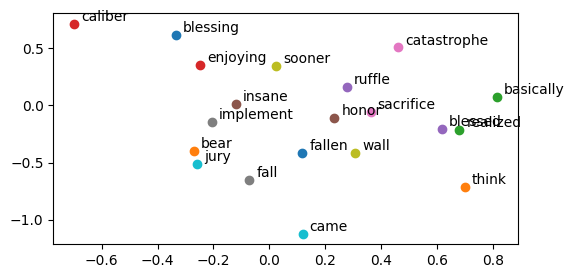

In [18]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 4.4. Cosine Similarity

In [19]:
#select a few vocabs and get their embeddings
democracy = get_embed('democracy')
law = get_embed('law')
man = get_embed('man')
men = get_embed('men')
world = get_embed('world')
country = get_embed('country')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

print(f"democracy vs. law: ", cos_sim(democracy, law))
print(f"man vs. men: ", cos_sim(man, men))
print(f"world vs. country: ", cos_sim(world, country))

democracy vs. law:  0.8757285884669204
man vs. men:  0.9877020206402968
world vs. country:  -0.34237255017541945


### 5. Skip-gram with Negative Sampling

#### 5.1. Unigram Distribution

#### 5.2. Negative Sampling

#### 5.3. Model

#### 5.4. Training

#### 5.5. Plotting the Embeddings

#### 5.6. Cosine Similarity